In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import mannwhitneyu, normaltest
import statsmodels.formula.api as smf

RAND = 123
K = 5

In [4]:
df = pd.read_csv(r"D:\DataScience\Projects\Cardio\data\data_cleaned\data_cleaned.csv")

## 02 Feature_vs_Target_Visualization

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è age-cardio:
         cardio      age
cardio  1.00000  0.23956
age     0.23956  1.00000



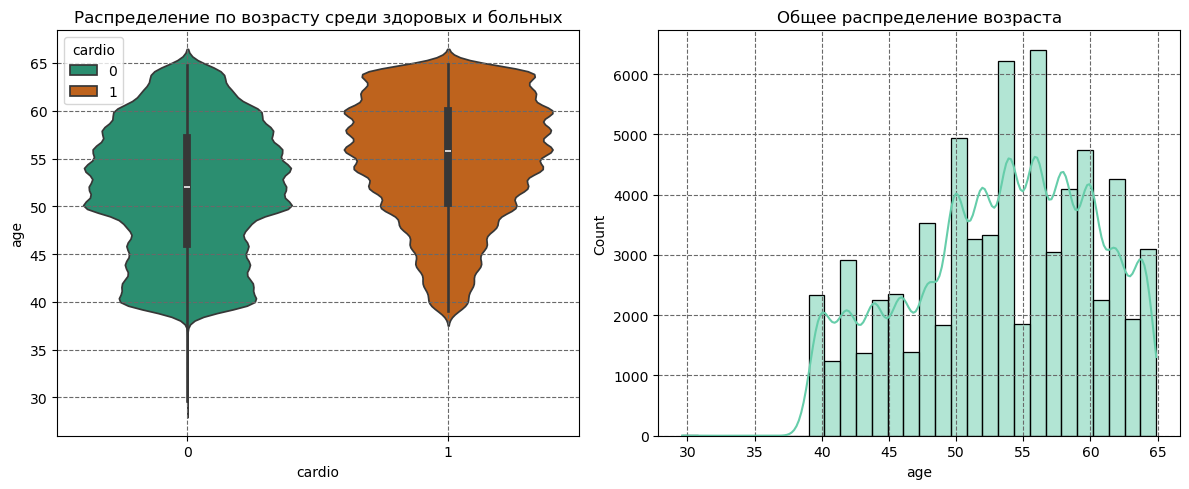

In [23]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è age-cardio:")
print(f"{df[['cardio', 'age']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='age', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.histplot(df, x='age', bins=30, kde=True, color='mediumaquamarine', ax=ax[1])
ax[1].set_title("–û–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞")
ax[1].grid(color='dimgray', linestyle='--')

plt.tight_layout()
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –æ—Ç—á—ë—Ç–ª–∏–≤–æ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –ø—Ä—è–º–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–æ–º –∏ –Ω–∞–ª–∏—á–∏–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è: —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –≤–æ–∑—Ä–∞—Å—Ç–∞ —Ä–∞—Å—Ç—ë—Ç –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –±–æ–ª–µ–∑–Ω–∏. –û–¥–Ω–∞–∫–æ —Å—Ç–µ–ø–µ–Ω—å —ç—Ç–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ–ª—å–∑—è –Ω–∞–∑–≤–∞—Ç—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–π, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∑–∫–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.

–î–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –ø–æ gender (–≤ %):
gender
1    65.1
2    34.9
Name: proportion, dtype: float64

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è gender-cardio:
          cardio    gender
cardio  1.000000  0.007067
gender  0.007067  1.000000



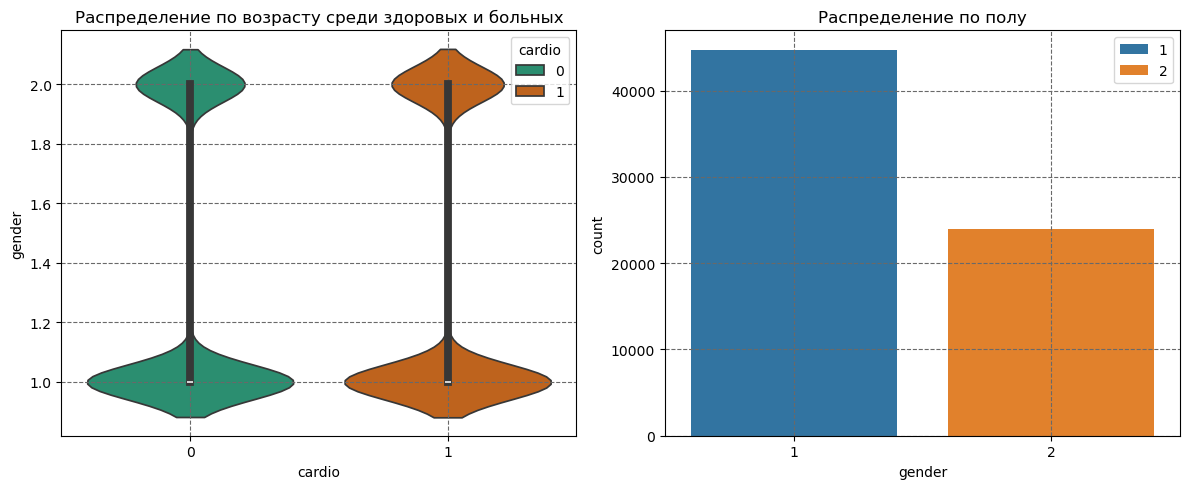

In [39]:
print(f"–î–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –ø–æ gender (–≤ %):")
print(f"{round(df.gender.value_counts(normalize=True)*100,1)}\n")
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è gender-cardio:")
print(f"{df[['cardio', 'gender']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='gender', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.countplot(df, x='gender', hue='gender', palette='tab10', ax=ax[1])
ax[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É")
ax[1].grid(color='dimgray', linestyle='--')
ax[1].legend()

plt.tight_layout()
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø–æ–ª–æ–º –∏—Å–ø—ã—Ç—É–µ–º–æ–≥–æ –∏ –Ω–∞–ª–∏—á–∏–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è. –≠—Ç–æ—Ç –≤—ã–≤–æ–¥ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. –ë–æ–ª–µ–µ —à–∏—Ä–æ–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É –∂–µ–Ω—â–∏–Ω, –≤–µ—Ä–æ—è—Ç–Ω–æ, —Å–≤—è–∑–∞–Ω–æ —Å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—Å–æ–≤.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è height-cardio:
          cardio    height
cardio  1.000000 -0.011736
height -0.011736  1.000000



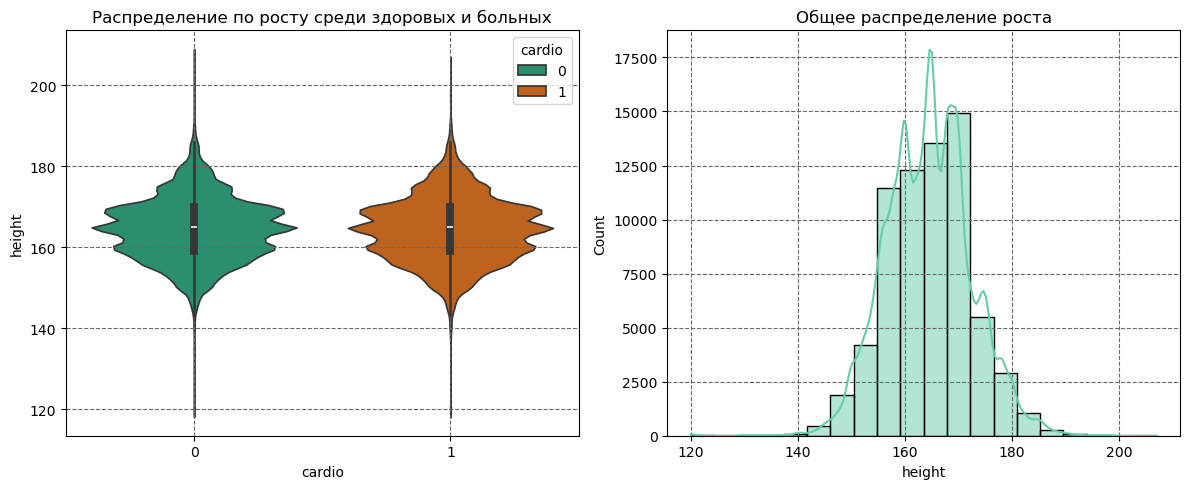

In [44]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è height-cardio:")
print(f"{df[['cardio', 'height']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='height', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ä–æ—Å—Ç—É —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.histplot(df, x='height', bins=20, kde=True, color='mediumaquamarine', ax=ax[1])
ax[1].set_title("–û–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–æ—Å—Ç–∞")
ax[1].grid(color='dimgray', linestyle='--')

plt.tight_layout()
plt.show()

–†–∞–∑—É–º–µ–µ—Ç—Å—è, —è –Ω–µ –æ–∂–∏–¥–∞–ª –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞–ª–∏—á–∏—è –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è –æ—Ç —Ä–æ—Å—Ç–∞ ‚Äî –ø–æ—Å—Ç—Ä–æ–∏–ª —ç—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ —Å–∫–æ—Ä–µ–µ —Ä–∞–¥–∏ –¥—É—à–µ–≤–Ω–æ–≥–æ —Å–ø–æ–∫–æ–π—Å—Ç–≤–∏—è üòÑ. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –±–ª–∏–∑–æ–∫ –∫ –Ω—É–ª—é, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã ‚Äî –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç. –ß—Ç–æ –∏ —Ç—Ä–µ–±–æ–≤–∞–ª–æ—Å—å –¥–æ–∫–∞–∑–∞—Ç—å!

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è weight-cardio:
          cardio    weight
cardio  1.000000  0.179891
weight  0.179891  1.000000



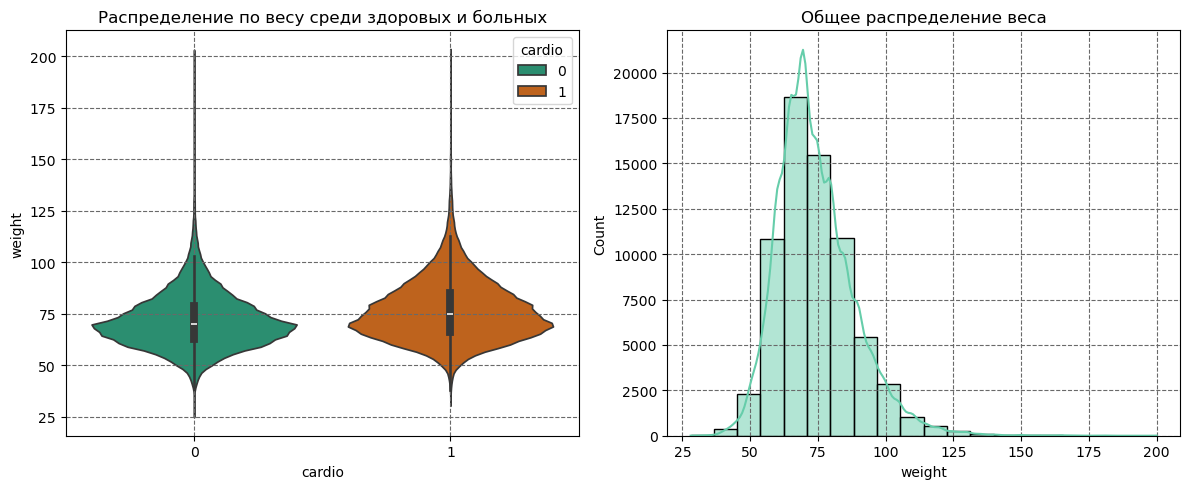

In [46]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è weight-cardio:")
print(f"{df[['cardio', 'weight']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='weight', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤–µ—Å—É —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.histplot(df, x='weight', bins=20, kde=True, color='mediumaquamarine', ax=ax[1])
ax[1].set_title("–û–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Å–∞")
ax[1].grid(color='dimgray', linestyle='--')

plt.tight_layout()
plt.show()

–ö –º–æ–µ–º—É —É–¥–∏–≤–ª–µ–Ω–∏—é, —á—ë—Ç–∫–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–∞–ª–∏—á–∏—è –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è –æ—Ç –≤–µ—Å–∞ –Ω–µ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ ‚Äî –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π. –î–∞, —É –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –º–∞—Ä–∫–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏—Å–ø—ã—Ç—É–µ–º—ã—Ö –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤—Ç–æ—Ä–∞—è –≤–µ—Ä—à–∏–Ω–∞ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏, –∏–∑-–∑–∞ —á–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–µ—Å–∞ –Ω–µ–º–Ω–æ–≥–æ –≤—ã—à–µ, —á–µ–º —É –∑–¥–æ—Ä–æ–≤—ã—Ö. –ù–æ —Ä–∞–∑–Ω–∏—Ü–∞ —Å–ª–∏—à–∫–æ–º –º–∞–ª–∞, —á—Ç–æ–±—ã –¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã‚Ä¶ –ò–ª–∏ –≤—Å—ë –∂–µ —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —ç—Ç–æ —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏?

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Å–∞ —Å—Ä–µ–¥–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –º–∞—Ä–∫–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏—Å–ø—ã—Ç—É–µ–º—ã—Ö –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ `–î‚Äô–ê–≥–æ—Å—Ç–∏–Ω–æ ‚Äî –ü–∏—Ä—Å–æ–Ω–∞`.

In [47]:
group_sick = df.weight[df.cardio == 1]
group_healthy = df.weight[df.cardio == 0]

print(normaltest(group_sick))
print(normaltest(group_healthy))

NormaltestResult(statistic=5470.9912051672445, pvalue=0.0)
NormaltestResult(statistic=6236.46777736502, pvalue=0.0)


`P-value` –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ –Ω—É–ª—é, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏. –ü–æ—ç—Ç–æ–º—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –ø—Ä–∏–º–µ–Ω–∏–º –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç `–ú–∞–Ω–Ω–∞ ‚Äî –£–∏—Ç–Ω–∏`.

–ì–∏–ø–æ—Ç–µ–∑—ã:

* `H‚ÇÄ`: –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç.

* `H‚ÇÅ`: –ú–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞.

In [48]:
u_stat, p_value = mannwhitneyu(group_sick, group_healthy)
print(f"U-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {u_stat}")
print(f"p-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print(f"–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É: –º–µ–∂–¥—É  –≥—Ä—É–ø–ø–∞–º–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞.")
else:
    print(f"–ù—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ—Ç–≤–µ—Ä–≥–∞—Ç—å –Ω–µ–ª—å–∑—è: —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –Ω–µ—Ç.")

U-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 712420615.5
p-value: 0.0
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É: –º–µ–∂–¥—É  –≥—Ä—É–ø–ø–∞–º–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞.


–ê–≥–∞! –í—Å—ë-—Ç–∞–∫–∏ –Ω–µ –∑—Ä—è —è —Ö–æ–∂—É –≤ —Å–ø–æ—Ä—Ç–∑–∞–ª üòÑ **–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞** –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ **–µ—Å—Ç—å**. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ —Ç–æ–º, —á—Ç–æ –ª–∏—à–Ω–∏–π –≤–µ—Å —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ä–∞–∑–≤–∏—Ç–∏—è —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è.

**–î–∞–ª–µ–µ –≤—ã–¥–≤–∏–≥–∞—é –≥–∏–ø–æ—Ç–µ–∑—É**: `–≤–æ–∑—Ä–∞—Å—Ç` –∏ `–∫–æ—Ä–ø—É–ª–µ–Ω—Ç–Ω–æ—Å—Ç—å` **–≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏** —è–≤–ª—è—é—Ç—Å—è –±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –¥–ª—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è.

–í–æ—Å–ø–æ–ª—å–∑—É—é—Å—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ —Å–æ–≤–æ–∫—É–ø–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è.

In [49]:
model = smf.logit("cardio ~ age + weight + age:weight", data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.647831
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                68684
Model:                          Logit   Df Residuals:                    68680
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                 0.06530
Time:                        18:24:13   Log-Likelihood:                -44496.
converged:                       True   LL-Null:                       -47604.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5188      0.361    -26.402      0.000     -10.225      -8.812
age            0.1422      0.

In [50]:
model = smf.logit("cardio ~ age + weight", data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.648634
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                68684
Model:                          Logit   Df Residuals:                    68681
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                 0.06414
Time:                        18:24:15   Log-Likelihood:                -44551.
converged:                       True   LL-Null:                       -47604.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8631      0.080    -73.342      0.000      -6.020      -5.706
age            0.0734      0.

–ö —Å–æ–∂–∞–ª–µ–Ω–∏—é, –∑–Ω–∞—á–µ–Ω–∏—è `Pseudo R¬≤` –æ–∫–∞–∑–∞–ª–∏—Å—å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã–º–∏. –ù–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è. –í–µ—Ä–Ω—É—Å—å –∫ –Ω–µ–π –ø–æ–∑–∂–µ ‚Äî –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π `Random Forest` –∏ `–Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏`.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è ap_hi-cardio:
          cardio     ap_hi
cardio  1.000000  0.426847
ap_hi   0.426847  1.000000



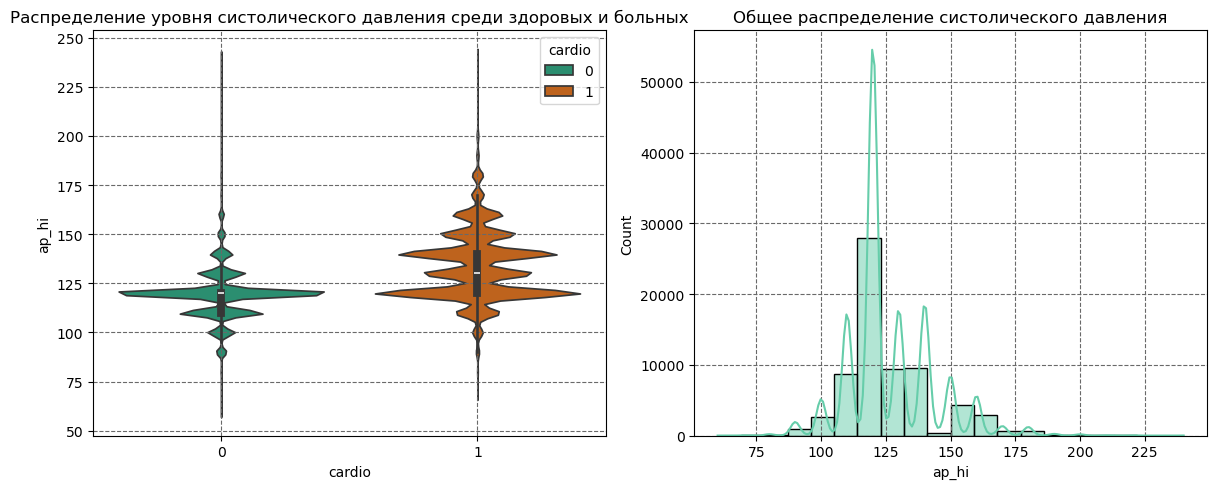

In [62]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è ap_hi-cardio:")
print(f"{df[['cardio', 'ap_hi']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='ap_hi', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è —Å–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.histplot(df, x='ap_hi', bins=20, kde=True, color='mediumaquamarine', ax=ax[1])
ax[1].set_title("–û–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è")
ax[1].grid(color='dimgray', linestyle='--')

plt.tight_layout()
plt.show()

–í –≥—Ä—É–ø–ø–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –º–∞—Ä–∫–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏—Å–ø—ã—Ç—É–µ–º—ã—Ö —Å–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –∑–∞–º–µ—Ç–Ω–æ –≤—ã—à–µ. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Å—Ä–µ–¥–Ω–µ–º —É—Ä–æ–≤–Ω–µ, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É —Å–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–∏–º –¥–∞–≤–ª–µ–Ω–∏–µ–º –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è ap_lo-cardio:
          cardio     ap_lo
cardio  1.000000  0.337994
ap_lo   0.337994  1.000000



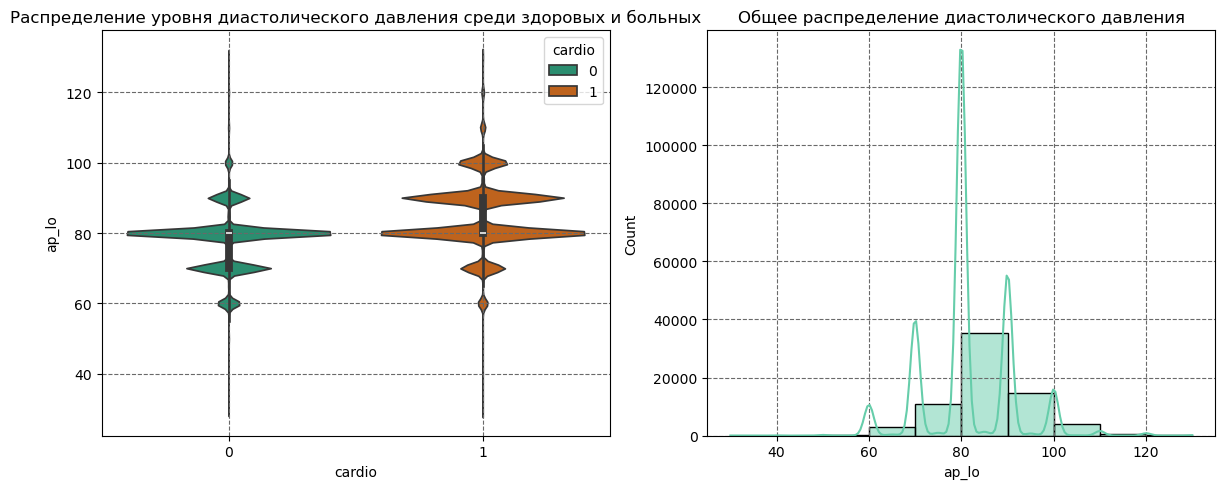

In [64]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è ap_lo-cardio:")
print(f"{df[['cardio', 'ap_lo']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='ap_lo', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è –¥–∏–∞—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.histplot(df, x='ap_lo', bins=10, kde=True, color='mediumaquamarine', ax=ax[1])
ax[1].set_title("–û–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∏–∞—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è")
ax[1].grid(color='dimgray', linestyle='--')

plt.tight_layout()
plt.show()


–î–∏–∞—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Å—Ö–æ–∂—É—é –¥–∏–Ω–∞–º–∏–∫—É —Å —Å–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–∏–º, –æ–¥–Ω–∞–∫–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–µ–º–Ω–æ–≥–æ –Ω–∏–∂–µ.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è cholesterol-cardio:
               cardio  cholesterol
cardio       1.000000     0.221488
cholesterol  0.221488     1.000000



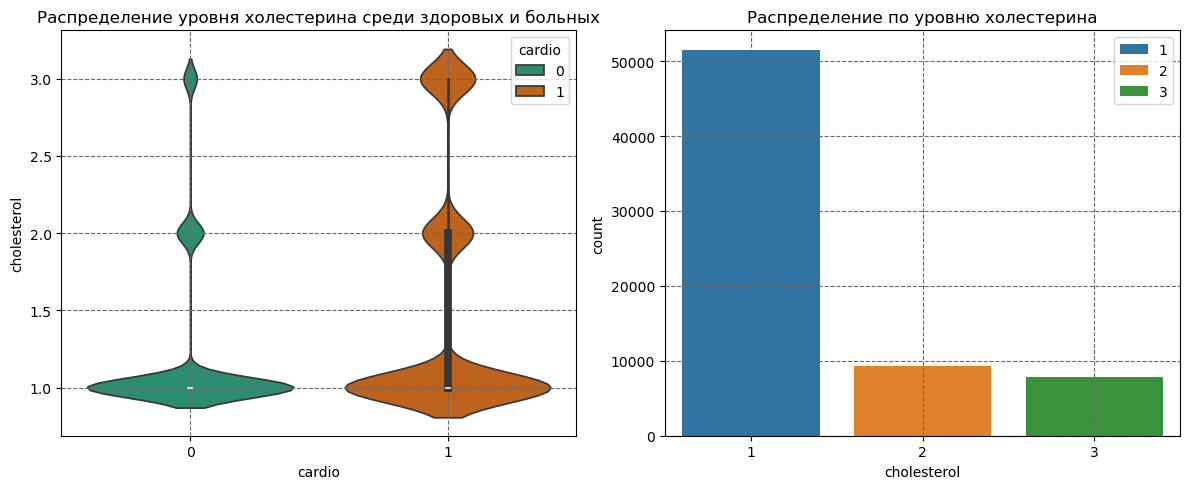

In [66]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è cholesterol-cardio:")
print(f"{df[['cardio', 'cholesterol']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='cholesterol', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.countplot(df, x='cholesterol', hue='cholesterol', palette='tab10', ax=ax[1])
ax[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É—Ä–æ–≤–Ω—é —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞")
ax[1].grid(color='dimgray', linestyle='--')
ax[1].legend()

plt.tight_layout()
plt.show()

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –ø–æ —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω—É —É –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –º–∞—Ä–∫–∏—Ä–æ–≤–∫–æ–π (–Ω–∞–ª–∏—á–∏–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è) –æ–∫–∞–∑—ã–≤–∞—é—Ç—Å—è —à–∏—Ä–µ –∏ –≤—ã—à–µ –≤–æ –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ —Ç–æ–º, —á—Ç–æ –ø–æ–≤—ã—à–µ–Ω–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ —Å–≤—è–∑–∞–Ω —Å –ø–æ–≤—ã—à–µ–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è gluc-cardio:
         cardio     gluc
cardio  1.00000  0.08988
gluc    0.08988  1.00000



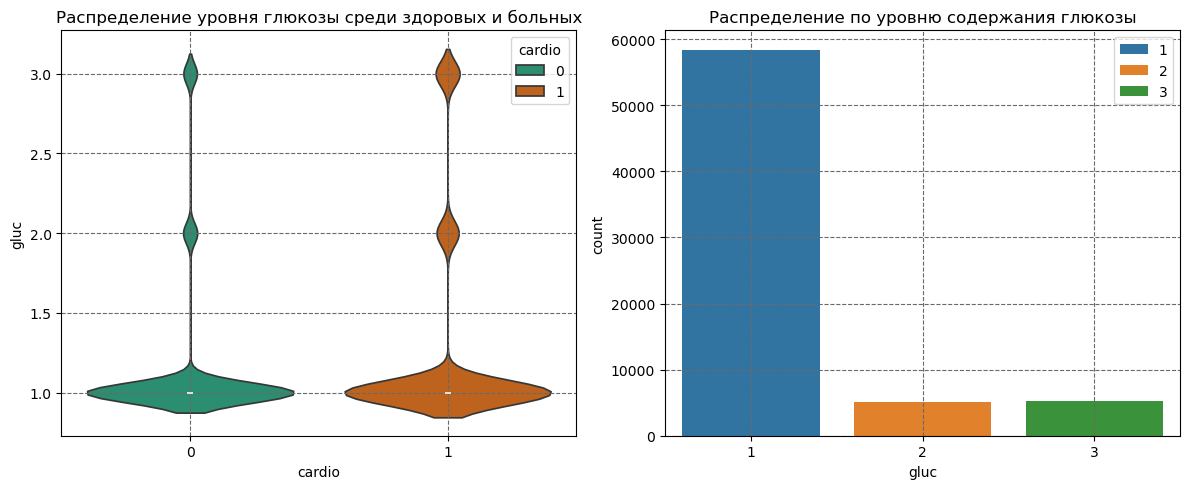

In [67]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è gluc-cardio:")
print(f"{df[['cardio', 'gluc']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='gluc', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è –≥–ª—é–∫–æ–∑—ã —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.countplot(df, x='gluc', hue='gluc', palette='tab10', ax=ax[1])
ax[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É—Ä–æ–≤–Ω—é —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –≥–ª—é–∫–æ–∑—ã")
ax[1].grid(color='dimgray', linestyle='--')
ax[1].legend()

plt.tight_layout()
plt.show()

–î–∞–Ω–Ω—ã–µ –ø–æ –≥–ª—é–∫–æ–∑–µ —Å—Ö–æ–∂–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ –ø–æ —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω—É. –ó–∞–º–µ—á—É, —á—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ –≥–ª—é–∫–æ–∑–µ –Ω–∏–∂–µ, —á–µ–º –ø–æ —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω—É.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è smoke-cardio:
          cardio     smoke
cardio  1.000000 -0.016312
smoke  -0.016312  1.000000



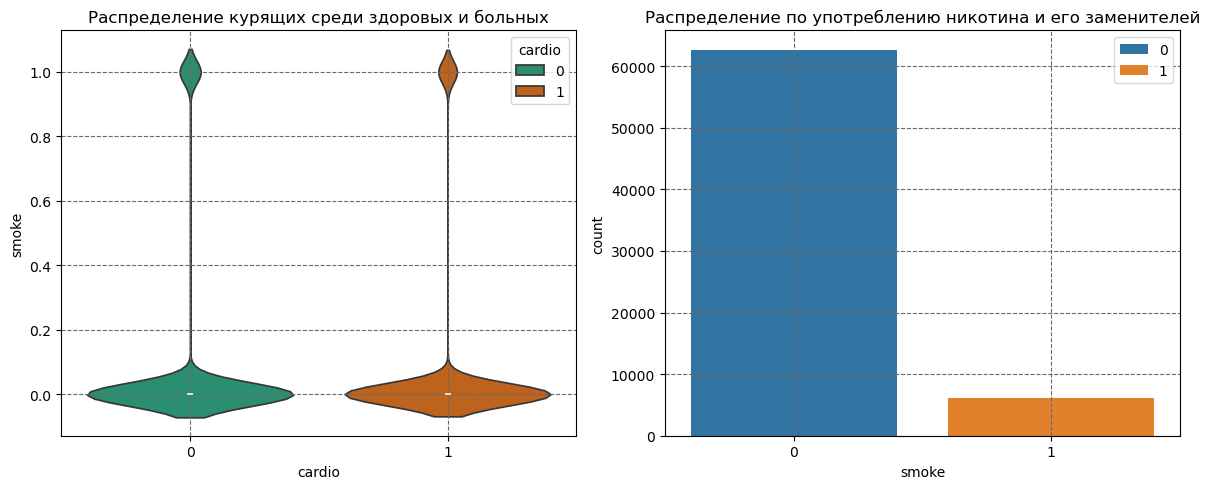

In [69]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è smoke-cardio:")
print(f"{df[['cardio', 'smoke']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='smoke', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫—É—Ä—è—â–∏—Ö —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.countplot(df, x='smoke', hue='smoke', palette='tab10', ax=ax[1])
ax[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—é –Ω–∏–∫–æ—Ç–∏–Ω–∞ –∏ –µ–≥–æ –∑–∞–º–µ–Ω–∏—Ç–µ–ª–µ–π")
ax[1].grid(color='dimgray', linestyle='--')
ax[1].legend()

plt.tight_layout()
plt.show()

–ö—É—Ä–µ–Ω–∏–µ, –∫–∞–∫ –Ω–∏ —Å—Ç—Ä–∞–Ω–Ω–æ, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è. –≠—Ç–æ —É–¥–∏–≤–ª—è–µ—Ç, —É—á–∏—Ç—ã–≤–∞—è –æ–±—â–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–µ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è alco-cardio:
          cardio      alco
cardio  1.000000 -0.008702
alco   -0.008702  1.000000



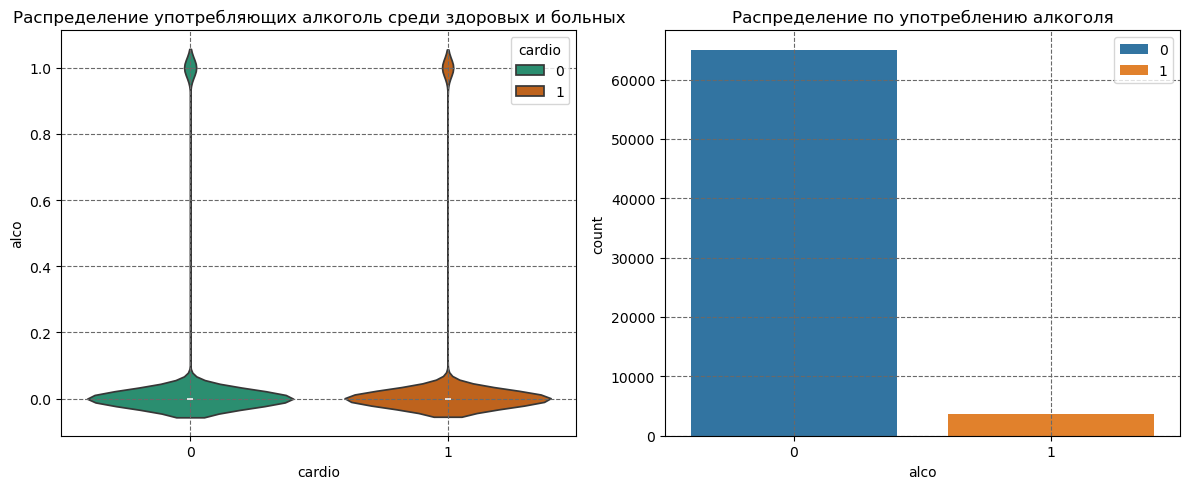

In [70]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è alco-cardio:")
print(f"{df[['cardio', 'alco']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='alco', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É–ø–æ—Ç—Ä–µ–±–ª—è—é—â–∏—Ö –∞–ª–∫–æ–≥–æ–ª—å —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.countplot(df, x='alco', hue='alco', palette='tab10', ax=ax[1])
ax[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—é –∞–ª–∫–æ–≥–æ–ª—è")
ax[1].grid(color='dimgray', linestyle='--')
ax[1].legend()

plt.tight_layout()
plt.show()

–£–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∞–ª–∫–æ–≥–æ–ª—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è. –≠—Ç–æ —É–¥–∏–≤–ª—è–µ—Ç, —É—á–∏—Ç—ã–≤–∞—è –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏–µ —Ä–∏—Å–∫–∏. –í–æ–∑–º–æ–∂–Ω–æ, –≤–ª–∏—è–Ω–∏–µ –∞–ª–∫–æ–≥–æ–ª—è –æ–ø–æ—Å—Ä–µ–¥–æ–≤–∞–Ω–æ –¥—Ä—É–≥–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏–ª–∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã—Ä–∞–∂–µ–Ω–æ –≤ –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è active-cardio:
          cardio    active
cardio  1.000000 -0.037509
active -0.037509  1.000000



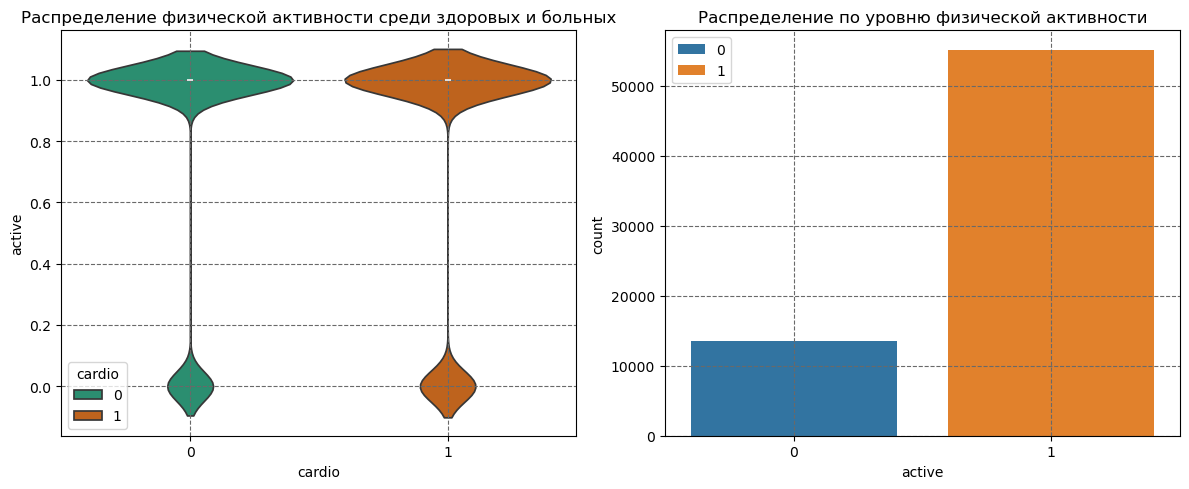

In [74]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è active-cardio:")
print(f"{df[['cardio', 'active']].corr()}\n")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(df, x='cardio', y='active', hue='cardio', palette='Dark2', ax=ax[0])
ax[0].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –∏ –±–æ–ª—å–Ω—ã—Ö")
ax[0].grid(color='dimgray', linestyle='--')

sns.countplot(df, x='active', hue='active', palette='tab10', ax=ax[1])
ax[1].set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É—Ä–æ–≤–Ω—é —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏")
ax[1].grid(color='dimgray', linestyle='--')
ax[1].legend()

plt.tight_layout()
plt.show()

–ê –≤–æ—Ç –Ω–∞–ª–∏—á–∏–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, —Å—É–¥—è –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º –∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –Ω–µ–º–Ω–æ–≥–æ –ø–æ–≤—ã—à–∞–µ—Ç —Ä–∏—Å–∫ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è!

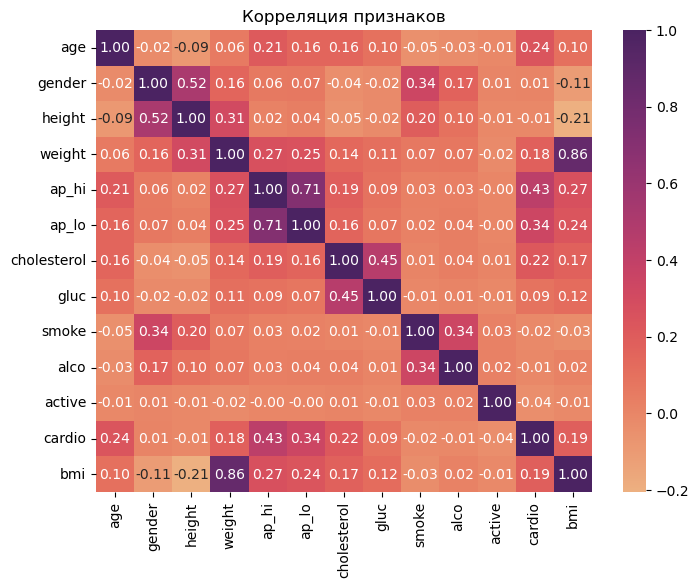

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='flare', fmt='.2f')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()